Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.
Epoch 1/12
2447/2447 [==============================] - ETA: 0s - loss: 1.3054 - accuracy: 0.6252

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2447/2447 [==============================] - 1649s 672ms/step - loss: 1.3054 - accuracy: 0.6252 - val_loss: 0.7757 - val_accuracy: 0.7777
Epoch 2/12
2447/2447 [==============================] - 1743s 712ms/step - loss: 0.4934 - accuracy: 0.8498 - val_loss: 0.5912 - val_accuracy: 0.8152
Epoch 3/12
2447/2447 [==============================] - 2065s 844ms/step - loss: 0.3473 - accuracy: 0.8941 - val_loss: 0.5257 - val_accuracy: 0.8357
Epoch 4/12
2447/2447 [==============================] - 1760s 719ms/step - loss: 0.2694 - accuracy: 0.9169 - val_loss: 0.4715 - val_accuracy: 0.8470
Epoch 5/12
2447/2447 [==============================] - 1765s 721ms/step - loss: 0.2312 - accuracy: 0.9276 - val_loss: 0.4732 - val_accuracy: 0.8485
Epoch 6/12
2447/2447 [==============================] - 1739s 711ms/step - loss: 0.1998 - accuracy: 0.9378 - val_loss: 0.4412 - val_accuracy: 0.8532
Epoch 7/12
2447/2447 [==============================] - 1740s 711ms/step - loss: 0.1773 - accuracy: 0.9448 - val_loss

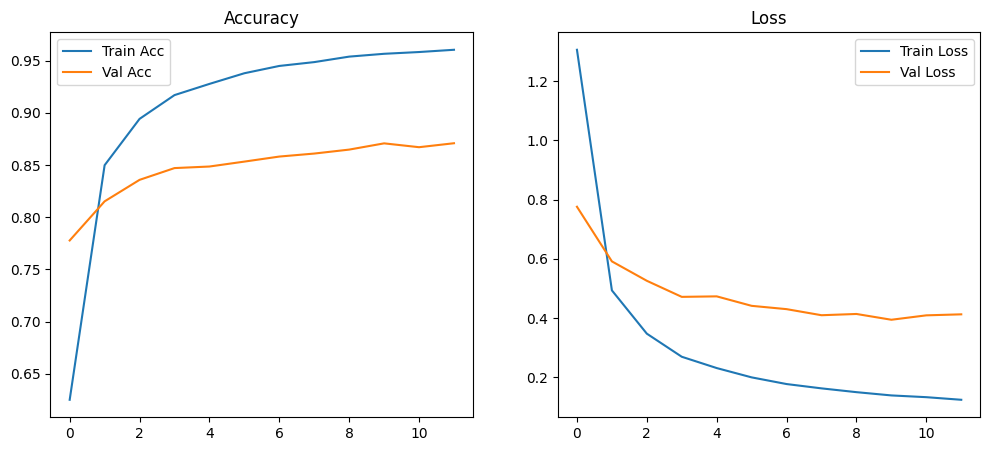

272/272 [==============================] - 170s 622ms/step - loss: 0.4056 - accuracy: 0.8651
✅ Validation Accuracy: 0.8651, Validation Loss: 0.4056


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# =========================
# 1. PARAMETERS
# =========================
dataset_path = "asl_alphabet_train"  # your dataset folder
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 12

# =========================
# 2. DATA PREPARATION
# =========================
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    fill_mode="nearest"
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    subset="training",
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    subset="validation",
    shuffle=False
)

# =========================
# 3. BASE MODEL
# =========================
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # Freeze base

# =========================
# 4. TOP MODEL
# =========================
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# =========================
# 5. CALLBACKS
# =========================
checkpoint = ModelCheckpoint("asl_transfer_model.h5", monitor="val_accuracy", save_best_only=True)
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# =========================
# 6. TRAIN
# =========================
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=[checkpoint, early_stop]
)

# =========================
# 7. SAVE MODEL
# =========================
model.save("asl_transfer_model_final.h5")
print("✅ Model saved as asl_transfer_model_final.h5")

# =========================
# 8. PLOT TRAINING CURVES
# =========================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")
plt.show()

# =========================
# 9. FINAL EVALUATION
# =========================
val_loss, val_acc = model.evaluate(val_data)
print(f"✅ Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Epoch 1/10
2175/2175 [==============================] - ETA: 0s - loss: 1.5505 - accuracy: 0.5515
Epoch 1: val_accuracy improved from -inf to 0.65385, saving model to asl_best_model.h5


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2175/2175 [==============================] - 1799s 823ms/step - loss: 1.5505 - accuracy: 0.5515 - val_loss: 1.2266 - val_accuracy: 0.6539 - lr: 1.0000e-04
Epoch 2/10
2175/2175 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.7885
Epoch 2: val_accuracy improved from 0.65385 to 0.71144, saving model to asl_best_model.h5
2175/2175 [==============================] - 2483s 1s/step - loss: 0.6912 - accuracy: 0.7885 - val_loss: 0.9754 - val_accuracy: 0.7114 - lr: 1.0000e-04
Epoch 3/10
2175/2175 [==============================] - ETA: 0s - loss: 0.5146 - accuracy: 0.8416
Epoch 3: val_accuracy improved from 0.71144 to 0.74517, saving model to asl_best_model.h5
2175/2175 [==============================] - 2218s 1s/step - loss: 0.5146 - accuracy: 0.8416 - val_loss: 0.8618 - val_accuracy: 0.7452 - lr: 1.0000e-04
Epoch 4/10
2175/2175 [==============================] - ETA: 0s - loss: 0.4270 - accuracy: 0.8673
Epoch 4: val_accuracy improved from 0.74517 to 0.75523, saving mode

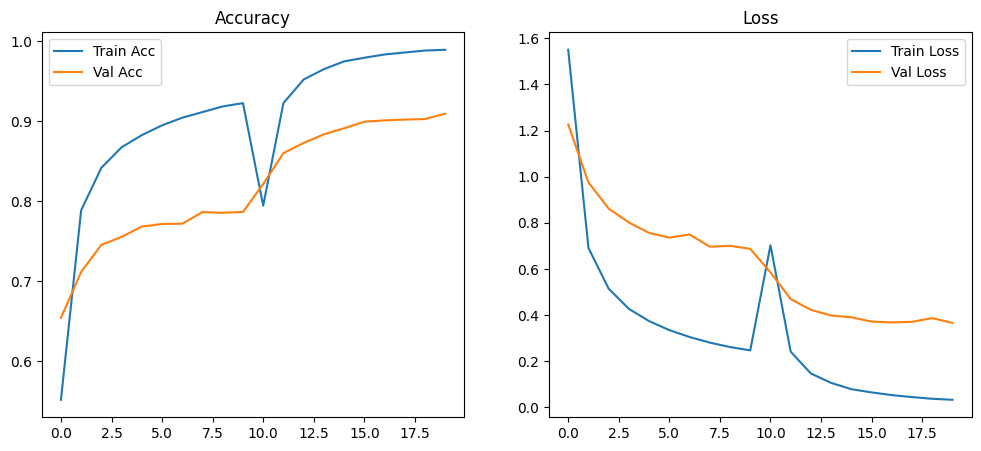

544/544 [==============================] - 460s 845ms/step - loss: 0.3771 - accuracy: 0.9055
✅ Validation Accuracy: 0.9055, Validation Loss: 0.3771


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os

# =========================
# 1. PARAMETERS
# =========================
dataset_path = "asl_alphabet_train"  # your dataset folder
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS_TRANSFER = 10
EPOCHS_FINETUNE = 10
FINE_TUNE_AT = 100  # unfreeze from this layer onward
MODEL_PATH = "asl_best_model.h5"

# =========================
# 2. DATA PREPARATION
# =========================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=False,
    brightness_range=[0.7,1.3],
    fill_mode="nearest"
)

train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    subset="training",
    shuffle=True
)

val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    subset="validation",
    shuffle=False
)

# =========================
# 3. BASE MODEL (MobileNetV2)
# =========================
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # Freeze base initially

# =========================
# 4. CLASSIFIER HEAD
# =========================
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# =========================
# 5. CALLBACKS
# =========================
checkpoint = ModelCheckpoint(MODEL_PATH, monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

callbacks = [checkpoint, early_stop, reduce_lr]

# =========================
# 6. TRANSFER LEARNING TRAINING
# =========================
history_transfer = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS_TRANSFER,
    callbacks=callbacks
)

# =========================
# 7. FINE-TUNING
# =========================
base_model.trainable = True
for layer in base_model.layers[:FINE_TUNE_AT]:
    layer.trainable = False

model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS_FINETUNE,
    callbacks=callbacks
)

# =========================
# 8. SAVE FINAL MODEL
# =========================
model.save("asl_final_model.h5")
print("✅ Final model saved as asl_final_model.h5")

# =========================
# 9. PLOT TRAINING CURVES
# =========================
acc = history_transfer.history['accuracy'] + history_finetune.history['accuracy']
val_acc = history_transfer.history['val_accuracy'] + history_finetune.history['val_accuracy']
loss = history_transfer.history['loss'] + history_finetune.history['loss']
val_loss = history_transfer.history['val_loss'] + history_finetune.history['val_loss']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(acc, label="Train Acc")
plt.plot(val_acc, label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.legend()
plt.title("Loss")
plt.show()

# =========================
# 10. FINAL EVALUATION
# =========================
val_loss, val_acc = model.evaluate(val_data)
print(f"✅ Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")
